## Observations and Insights

## Dependencies and starter code

In [204]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merge_data.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [205]:
merge_data["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

In [206]:
merge_data["Mouse ID"].value_counts()

g989    13
t718    10
o562    10
r811    10
e662    10
        ..
l872     1
o848     1
x336     1
n482     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary statistics

In [207]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# remove un-needed  columns
drug_data = merge_data.loc[:, ["Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
drug_data.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Ramicane,0,45.000000
1,Ramicane,5,38.825898
2,Ramicane,10,35.014271
3,Ramicane,15,34.223992
4,Ramicane,20,32.997729


In [208]:
# find Tumor Volume mean by regimen
# create a group by data set, based on the regimen and and time
drug_group = drug_data.groupby(["Drug Regimen","Timepoint"])
#find the mean
drug_mean = drug_group.mean()
drug_mean.head(25)

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                   45.000000
             5                   44.266086
             10                  43.084291
             15                  42.064317
             20                  40.716325
             25                  39.939528
             30                  38.769339
             35                  37.816839
             40                  36.958001
             45                  36.236114
Ceftamin     0                   45.000000
             5                   46.503051
             10                  48.285125
             15                  50.094055
             20                  52.157049
             25                  54.287674
             30                  56.769517
             35                  58.827548
             40                  61.467895
             45                  64.132421
Infubinol    0                   45.000000
             5                   46.541247
             10                  49.403909
             15                  51.296397
             20                  53.197691

In [209]:
# find Tumor Volume median by regimen
drug_median = drug_group.median()
drug_median.head(20)

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                   45.000000
             5                   45.597064
             10                  43.421014
             15                  42.798160
             20                  40.716428
             25                  40.224165
             30                  39.260371
             35                  38.360455
             40                  36.843898
             45                  37.311846
Ceftamin     0                   45.000000
             5                   46.370798
             10                  48.164520
             15                  49.746427
             20                  52.112973
             25                  54.275954
             30                  56.362744
             35                  58.208362
             40                  60.600972
             45                  64.299830

In [210]:
# variance
drug_var = drug_group.var()
drug_var.head(20)

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                    0.000000
             5                    5.030889
             10                  12.344133
             15                  16.878693
             20                  19.035028
             25                  17.100444
             30                  19.210721
             35                  24.358640
             40                  31.441568
             45                  31.460537
Ceftamin     0                    0.000000
             5                    0.568299
             10                   1.115284
             15                   2.094922
             20                   2.326097
             25                   3.474610
             30                   3.851331
             35                   6.708893
             40                   7.027713
             45                  10.585242

In [211]:
#standard deviation
drug_std = drug_group.std()
drug_std.head(20)

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                    0.000000
             5                    2.242964
             10                   3.513422
             15                   4.108369
             20                   4.362915
             25                   4.135268
             30                   4.383004
             35                   4.935447
             40                   5.607278
             45                   5.608969
Ceftamin     0                    0.000000
             5                    0.753856
             10                   1.056070
             15                   1.447385
             20                   1.525155
             25                   1.864031
             30                   1.962481
             35                   2.590153
             40                   2.650983
             45                   3.253497

In [212]:
#find SEM
# set up a sample of the grouped data
drug_sem = sem(drug_data["Tumor Volume (mm3)"])
drug_sem

0.20443585034961514

## Bar plots

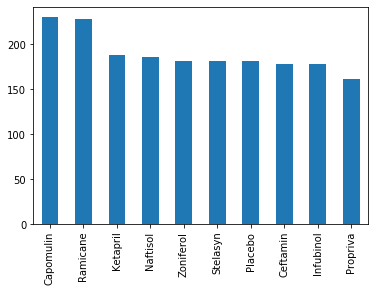

In [213]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points = merge_data["Drug Regimen"].value_counts().plot.bar()
data_points

<BarContainer object of 10 artists>

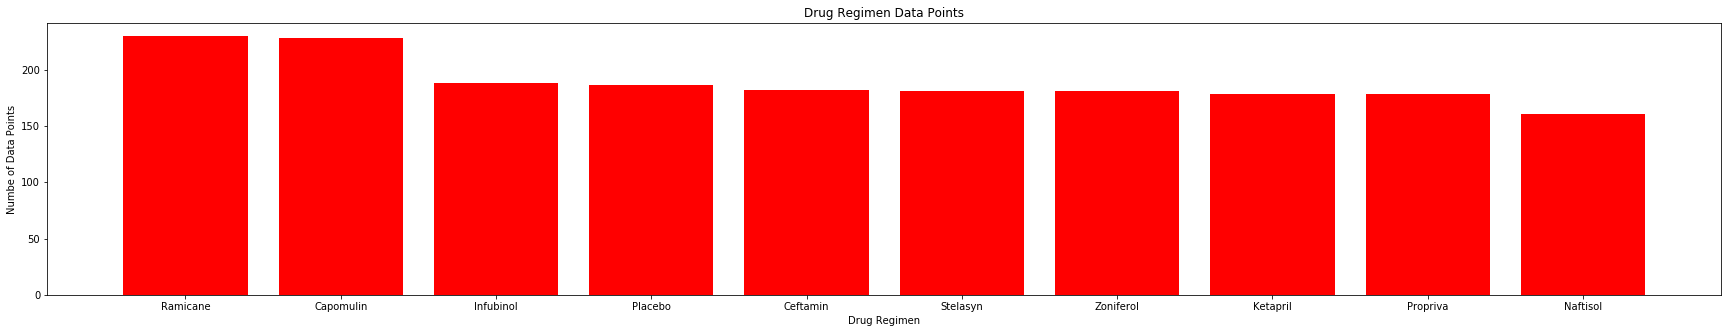

In [214]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
fig = plt.figure(figsize=(30,5))
plt.title("Drug Regimen Data Points")
plt.xlabel("Drug Regimen")
plt.ylabel("Numbe of Data Points")
y_axis = merge_data["Drug Regimen"].value_counts()
x_axis = merge_data["Drug Regimen"].unique()
plt.bar(x_axis, y_axis, color="red", align="center")

## Pie plots

[Male]      125
[Female]    124
Name: Sex, dtype: int64


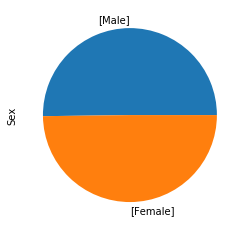

In [215]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_id = merge_data.loc[:, ["Mouse ID", "Sex"]]
id_group = mouse_id.groupby("Mouse ID")["Sex"].unique()
id_group.head(20)
gender_count = id_group.value_counts()
print(gender_count)
gender_count. plot.pie(y="Sex")

([<matplotlib.patches.Wedge at 0x18ded646988>,
 [Text(-1.0999781124353174, -0.006939175976765592, 'Male'),
  Text(1.0999781124353174, 0.006939175976765457, 'Female')],
 [Text(-0.5999880613283548, -0.003785005078235777, '50.2%'),
  Text(0.5999880613283548, 0.0037850050782357036, '49.8%')])

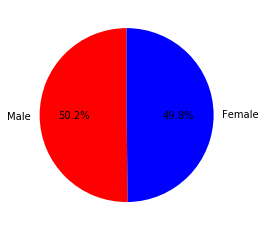

In [216]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_labels = ["Male", "Female"]
pie_colors = ["red", "blue"]
plt.pie(gender_count, labels=pie_labels, colors=pie_colors, autopct="%1.1f%%", startangle=90)

## Quartiles, outliers and boxplots

In [217]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# To find the most promising treatments, use the regimens with the highest success rate
final_day = merge_data["Timepoint"]==45
day_45 = merge_data[final_day]
day_45["Drug Regimen"].value_counts()

Capomulin    21
Ramicane     20
Zoniferol    14
Naftisol     13
Ceftamin     13
Stelasyn     11
Placebo      11
Ketapril     11
Infubinol     9
Propriva      7
Name: Drug Regimen, dtype: int64

In [218]:
#Top 4 counts would be most promising, with highest number of survivors: Capomulin, Ramicane, Zoniferol, Naftisol
#find the final tumor volume of each mouse for each of the four treatments

#Capomulin
cap_45 = day_45[day_45["Drug Regimen"]=="Capomulin"]
cap_45.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2


In [219]:
#Calculate the IQR and quantitatively 
#determine if there are any potential outliers.
cap_size = cap_45["Tumor Volume (mm3)"]
cap_quartiles = cap_size.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq
print(f"The lower quartile of Capomulin is: {cap_lowerq}")
print(f"The upper quartile of Capomulin is: {cap_upperq}")
print(f"The interquartile range of Capomulin is: {cap_iqr}")
print(f"The the median of Capomulin is: {cap_quartiles[0.5]} ")

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [220]:
ram_45 = day_45[day_45["Drug Regimen"]=="Ramicane"]
ram_45.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [221]:
#Calculate the IQR and quantitatively 
#determine if there are any potential outliers.
ram_size = ram_45["Tumor Volume (mm3)"]
ram_quartiles = ram_size.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq
print(f"The lower quartile of ramomulin is: {ram_lowerq}")
print(f"The upper quartile of ramomulin is: {ram_upperq}")
print(f"The interquartile range of ramomulin is: {ram_iqr}")
print(f"The the median of ramomulin is: {ram_quartiles[0.5]} ")

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

The lower quartile of ramomulin is: 30.981175224999998
The upper quartile of ramomulin is: 38.508305307499995
The interquartile range of ramomulin is: 7.527130082499998
The the median of ramomulin is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [222]:
zon_45 = day_45[day_45["Drug Regimen"]=="Zoniferol"]
zon_45.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
510,a401,Zoniferol,Female,8,25,45,66.794156,4
647,c264,Zoniferol,Female,11,27,45,67.942121,2
667,c302,Zoniferol,Female,10,29,45,64.575222,4
689,c559,Zoniferol,Female,19,28,45,61.840058,4
850,f545,Zoniferol,Female,20,26,45,73.324432,1


In [223]:
#Calculate the IQR and quantitatively 
#determine if there are any potential outliers.
zon_size = zon_45["Tumor Volume (mm3)"]
zon_quartiles = zon_size.quantile([.25,.5,.75])
zon_lowerq = zon_quartiles[0.25]
zon_upperq = zon_quartiles[0.75]
zon_iqr = zon_upperq - zon_lowerq
print(f"The lower quartile of zonomulin is: {zon_lowerq}")
print(f"The upper quartile of zonomulin is: {zon_upperq}")
print(f"The interquartile range of zonomulin is: {zon_iqr}")
print(f"The the median of zonomulin is: {zon_quartiles[0.5]} ")

zon_lower_bound = zon_lowerq - (1.5*zon_iqr)
zon_upper_bound = zon_upperq + (1.5*zon_iqr)
print(f"Values below {zon_lower_bound} could be outliers.")
print(f"Values above {zon_upper_bound} could be outliers.")

The lower quartile of zonomulin is: 62.61814874
The upper quartile of zonomulin is: 68.34176324
The interquartile range of zonomulin is: 5.723614500000004
The the median of zonomulin is: 65.68468877999999 
Values below 54.03272699 could be outliers.
Values above 76.92718499000001 could be outliers.


In [224]:
naf_45 = day_45[day_45["Drug Regimen"]=="Naftisol"]
naf_45.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
567,a818,Naftisol,Female,12,28,45,74.997764,2
610,b559,Naftisol,Male,20,26,45,73.051363,1
774,e213,Naftisol,Male,8,27,45,63.105696,4
810,e584,Naftisol,Male,9,27,45,68.359777,4
1013,j755,Naftisol,Male,23,27,45,69.563621,1


In [225]:
#Calculate the IQR and quantitatively 
#determine if there are any potential outliers.
naf_size = naf_45["Tumor Volume (mm3)"]
naf_quartiles = naf_size.quantile([.25,.5,.75])
naf_lowerq = naf_quartiles[0.25]
naf_upperq = naf_quartiles[0.75]
naf_iqr = naf_upperq - naf_lowerq
print(f"The lower quartile of nafomulin is: {naf_lowerq}")
print(f"The upper quartile of nafomulin is: {naf_upperq}")
print(f"The interquartile range of nafomulin is: {naf_iqr}")
print(f"The the median of nafomulin is: {naf_quartiles[0.5]} ")

naf_lower_bound = naf_lowerq - (1.5*naf_iqr)
naf_upper_bound = naf_upperq + (1.5*naf_iqr)
print(f"Values below {naf_lower_bound} could be outliers.")
print(f"Values above {naf_upper_bound} could be outliers.")

The lower quartile of nafomulin is: 63.94664044
The upper quartile of nafomulin is: 73.86784476
The interquartile range of nafomulin is: 9.921204319999994
The the median of nafomulin is: 69.56362076 
Values below 49.064833960000016 could be outliers.
Values above 88.74965123999999 could be outliers.


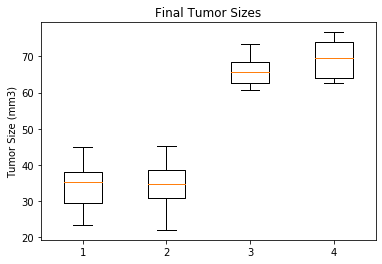

In [248]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_data = [cap_size, ram_size, zon_size, naf_size]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Sizes')
ax1.set_ylabel('Tumor Size (mm3)')
ax1.boxplot(box_data)
plt.show()

In [227]:
naf_size.head()

567     74.997764
610     73.051363
774     63.105696
810     68.359777
1013    69.563621
Name: Tumor Volume (mm3), dtype: float64

## Line and scatter plots

In [228]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#capomulin dataframe:
cap_data = merge_data.loc[:, ["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
cap_df = cap_data[cap_data["Drug Regimen"]=="Capomulin"]
mouse_ind = cap_df[cap_df["Mouse ID"]=="s185"]
mouse_ind

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
10,Capomulin,s185,0,45.000000
11,Capomulin,s185,5,43.878496
12,Capomulin,s185,10,37.614948
13,Capomulin,s185,15,38.177232
14,Capomulin,s185,20,36.866876
15,Capomulin,s185,25,33.949940
16,Capomulin,s185,30,32.959671
17,Capomulin,s185,35,28.328531
18,Capomulin,s185,40,25.472143
19,Capomulin,s185,45,23.343598


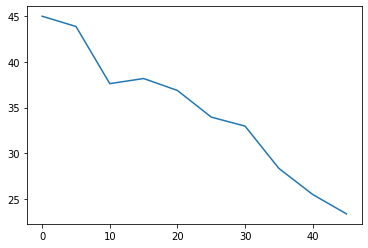

In [229]:
cap_time = mouse_ind["Timepoint"]
cap_size = mouse_ind["Tumor Volume (mm3)"]
cap_plot = plt.plot(cap_time, cap_size,)

In [230]:
# Generate a scatter plot of mouse weight versus average tumor volume
#for the Capomulin regimen
cap_weight = merge_data.loc[:, ["Drug Regimen", "Timepoint", "Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
cap_df = cap_weight[cap_weight ["Drug Regimen"]=="Capomulin"]
cap_df.head()

,Drug Regimen,Timepoint,Mouse ID,Weight (g),Tumor Volume (mm3)
10,Capomulin,0,s185,17,45.000000
11,Capomulin,5,s185,17,43.878496
12,Capomulin,10,s185,17,37.614948
13,Capomulin,15,s185,17,38.177232
14,Capomulin,20,s185,17,36.866876


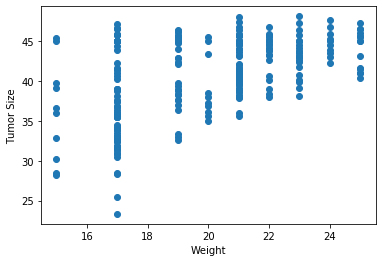

In [231]:
cap_x_values = cap_df['Weight (g)']
cap_y_values = cap_df['Tumor Volume (mm3)']
plt.scatter(cap_x_values,cap_y_values)
plt.xlabel('Weight')
plt.ylabel('Tumor Size')
plt.show()

The r-squared is: 0.5256995552077166


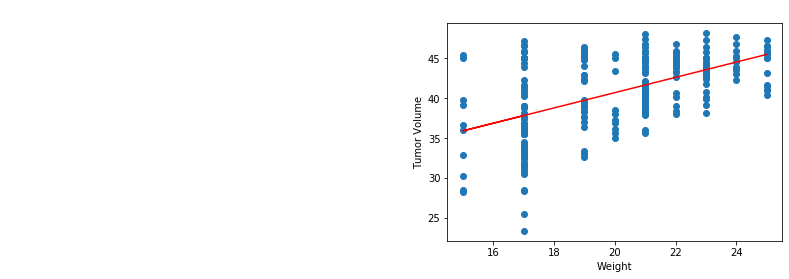

In [232]:
# Calculate the correlation coefficient and linear regression model
#for mouse weight and average tumor volume for the Capomulin regimen
cap_x = cap_df['Weight (g)']
cap_y = cap_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_x, cap_y)
regress_cap = cap_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cap_x,cap_y)
plt.plot(cap_x,regress_cap,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
print(f"The r-squared is: {rvalue}")
plt.show()